In [1]:
from api import API

/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
Using TensorFlow backend.
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kukunuri.sai/.conda/envs/nilmtk_env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: 

In [2]:

redd = {
  'power': {
    'mains': ['apparent','active'],
    'appliance': ['apparent','active']
  },
  'sample_rate': 60,
  'artificial_aggregate':True,
  'appliances': ['fridge','air conditioner','electric furnace','washing machine'],
  'methods': {
     'Mean': {},#,"FHMM_EXACT":{},"RNN":{},"Seq2Point":{},"Seq2Seq":{},"DAE":{},"WindowGRU":{},
      "AFHMM_SAC":{},
      'AFHMM':{}#,"AFHMM":{}
  },
   'train': {    
    'datasets': {
            'Dataport': {
                'path': '../dataport2.hdf5',
				'buildings': {
				10: {
					'start_time': '2015-04-04',
					'end_time': '2015-04-24'
				},
				15: {
					'start_time': '2015-04-30',
					'end_time': '2015-05-20'
				}
				}
				                
			}
			}
	},
	'test': {
	'datasets': {
		'Datport': {
			'path': '../dataport2.hdf5',
			'buildings': {
				10: {
					'start_time': '2015-04-25',
					'end_time': '2015-05-01'
					},
				15: {
					'start_time': '2015-05-20',
					'end_time': '2015-05-27'
					}
			}
	}
},
        'metrics':['mae']
}
}


Joint Testing for all algorithms
Loading data for  Datport  dataset
Dropping missing values
Creating an Artificial Aggregate
Num threads  13
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
Finished solving
started solving
started solving
Finished solving
Finished solving
started solving
Finished solving
Finished solving
started solving
started solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
started solving
Finished solving
Finished solving
started solving
Finished solving
Finished solving
started solving
started solving
Finished solving
started solving
Finishe

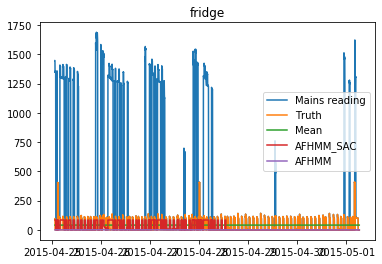

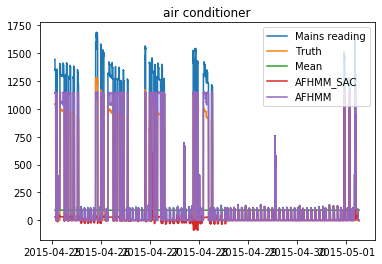

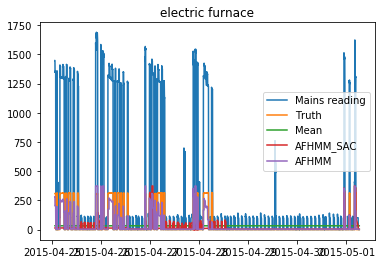

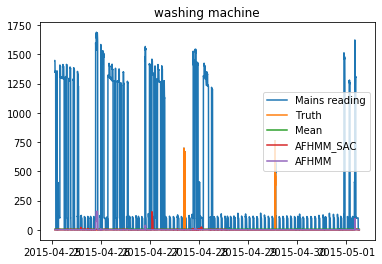

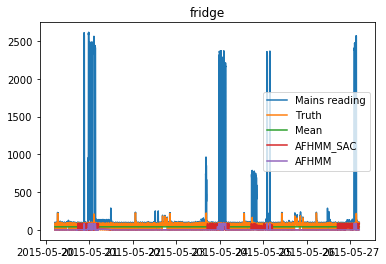

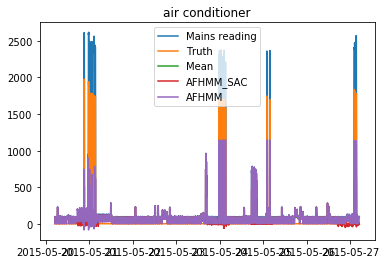

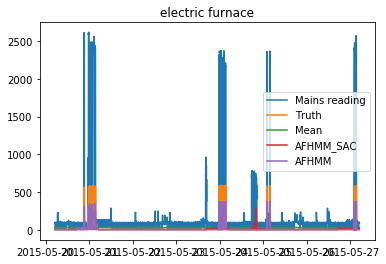

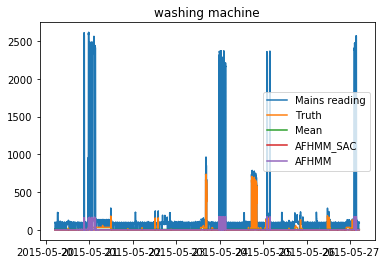

In [3]:
api_res = API(redd)

In [7]:
for i in api_res.errors:
    print (i)

                        Mean   AFHMM_SAC      AFHMM
fridge             48.931244   29.108257  33.634274
air conditioner   217.217117  154.282135  52.573719
electric furnace   70.432358   51.709881  20.799337
washing machine     7.248257    3.947682   3.729729
                        Mean  AFHMM_SAC       AFHMM
fridge             39.046425  43.981777   49.524635
air conditioner   135.736282  96.973877  102.162918
electric furnace   42.080956  21.858116   12.890176
washing machine    15.130778  12.381340   15.755315


In [8]:
import numpy as np
import pandas as pd

In [10]:
vals = np.concatenate([np.expand_dims(df.values,axis=2) for df in api_res.errors],axis=2)


cols = api_res.errors[0].columns
indexes = api_res.errors[0].index


mean = np.mean(vals,axis=2)
std = np.std(vals,axis=2)
print ('\n\n')
print ("Mean")
print (pd.DataFrame(mean,index=indexes,columns=cols))
print ('\n\n')
print ("Variance")
print (pd.DataFrame(std,index=indexes,columns=cols))




Mean
                        Mean   AFHMM_SAC      AFHMM
fridge             43.988834   36.545017  41.579454
air conditioner   176.476700  125.628006  77.368319
electric furnace   56.256657   36.783998  16.844757
washing machine    11.189517    8.164511   9.742522



Variance
                       Mean  AFHMM_SAC      AFHMM
fridge             4.942410   7.436760   7.945181
air conditioner   40.740417  28.654129  24.794600
electric furnace  14.175701  14.925882   3.954581
washing machine    3.941261   4.216829   6.012793
